## Covid Employemnt Visual analysis
In this notebook we visualize Employment in US dusing COVID-19

- which job types are most affected before and during pandamenic
- Impacts can be assessed through any discernible measure, e.g. market value, layoffs, remote working habits, resilience, etc.

additional - 
- industry types

judging-
1. Depth of insight into each job type
2. Quality of assumptions and approach

In [120]:
import pandas as pd
import plotly.express as px
import plotly.offline as py
from flask import Markup

In [115]:
#data source - United states department of labour https://oui.doleta.gov/unemploy/claims.asp
df = pd.read_csv('./data/unemp_claims.csv',sep="\t")
# group states together and taking mean values

#df_statewise
df.head()
df['Initial Claims'] = df['Initial Claims'].str.replace(',', '').astype(float)
df['Continued Claims'] = df['Continued Claims'].str.replace(',', '').astype(float)
df['Covered Employment'] = df['Covered Employment'].str.replace(',', '').astype(float)

df_statewise = df.groupby(['State']).sum().reset_index()
#df_statewise
df_statewise.head()


,State,Initial Claims,Continued Claims,Covered Employment,Insured Unemployment Rate
0,Alabama,688465.0,2580144.0,53956297.0,133.72
1,Alaska,164535.0,788568.0,8616242.0,256.01
2,Arizona,823016.0,3200431.0,80493403.0,110.97
3,Arkansas,318591.0,1727685.0,33488643.0,144.38
4,California,6990829.0,44972306.0,484336300.0,259.57


In [122]:
fig = px.bar(df_statewise,x='State',y='Initial Claims',title ="Total of Initial Claims rate by states",width=1200,height=600)
fig =Markup(fig)
fig

Markup("Figure({\n    'data': [{'alignmentgroup': 'True',\n              'hovertemplate': 'State=%{x}<br>Initial Claims=%{y}<extra></extra>',\n              'legendgroup': '',\n              'marker': {'color': '#636efa'},\n              'name': '',\n              'offsetgroup': '',\n              'orientation': 'v',\n              'showlegend': False,\n              'textposition': 'auto',\n              'type': 'bar',\n              'x': array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',\n                          'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',\n                          'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',\n                          'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',\n                          'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',\n                          'New Hampshire', 'New Jersey', 'New Mexico', 'New York',\n     

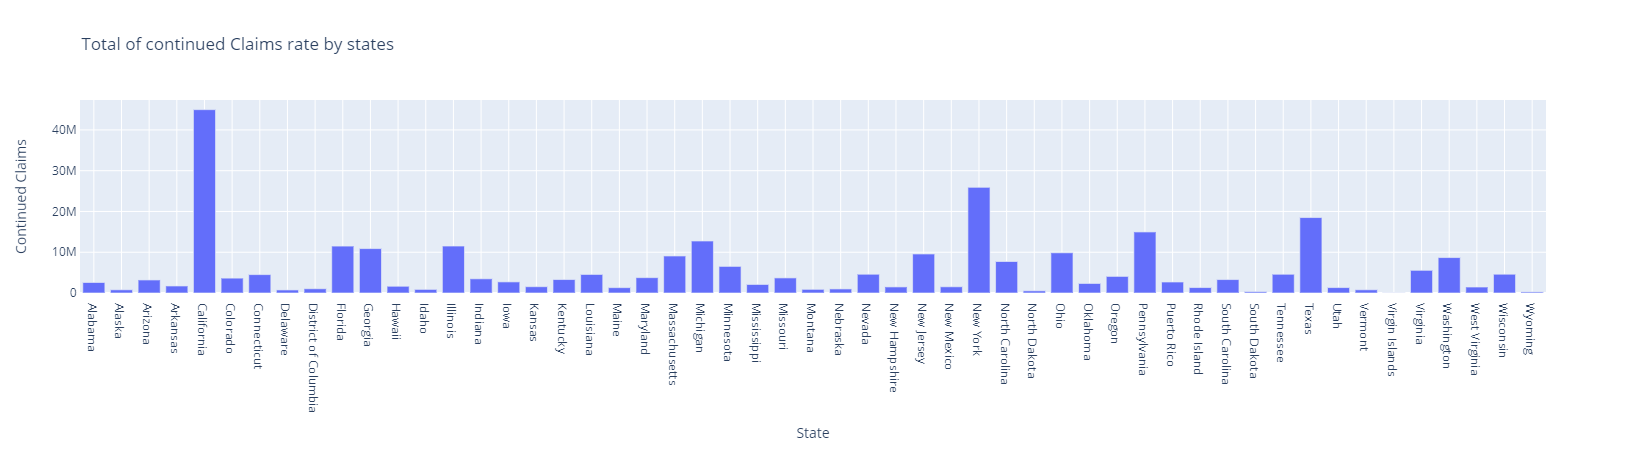

In [109]:
px.bar(df_statewise,x='State',y='Continued Claims',title ="Total of continued Claims rate by states")

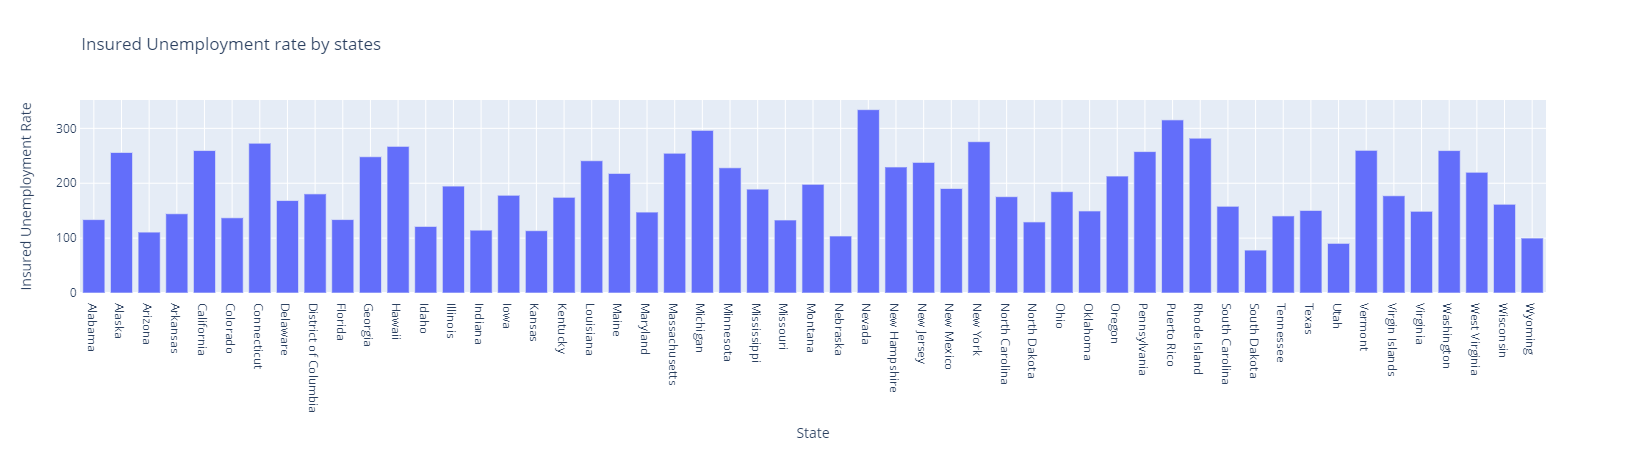

In [110]:
px.bar(df_statewise,x='State',y='Insured Unemployment Rate',title ="Insured Unemployment rate by states")

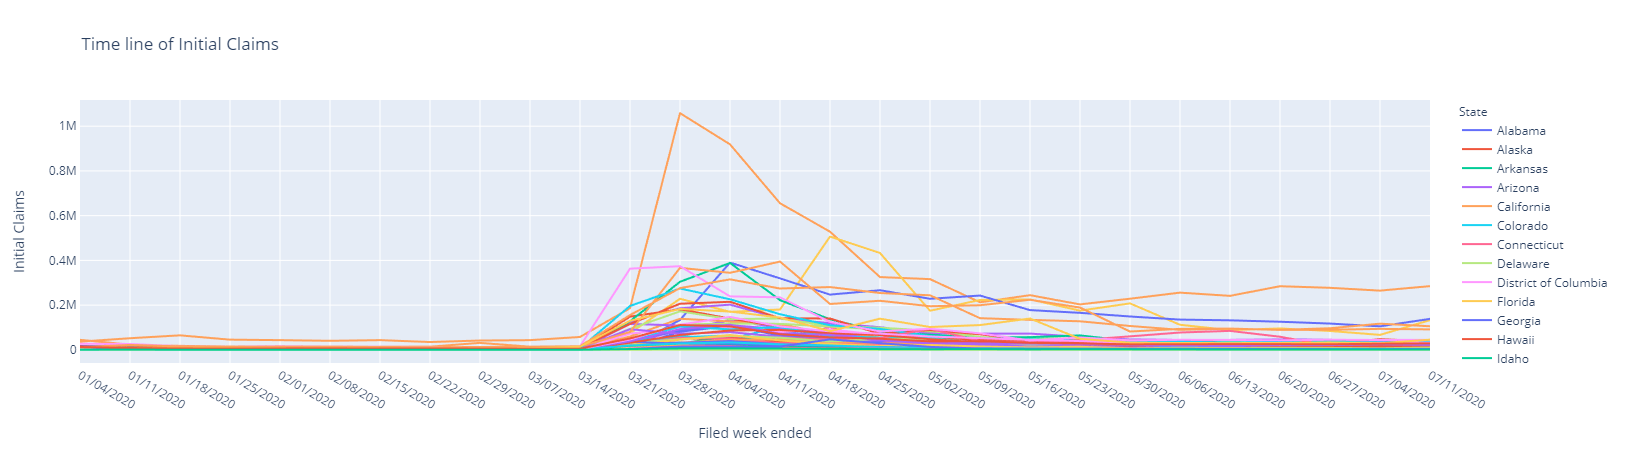

In [111]:
px.line(df,x='Filed week ended',y='Initial Claims',hover_data=['State'],title='Time line of Initial Claims',color='State')

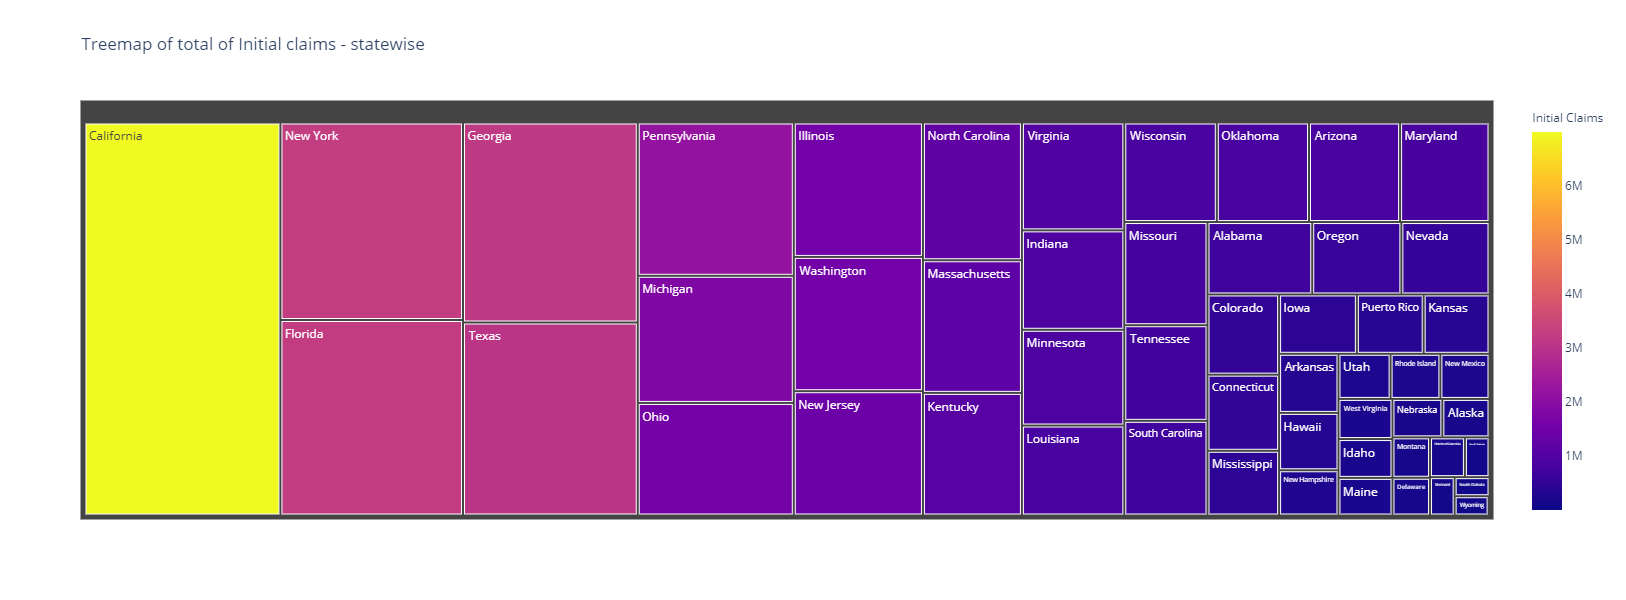

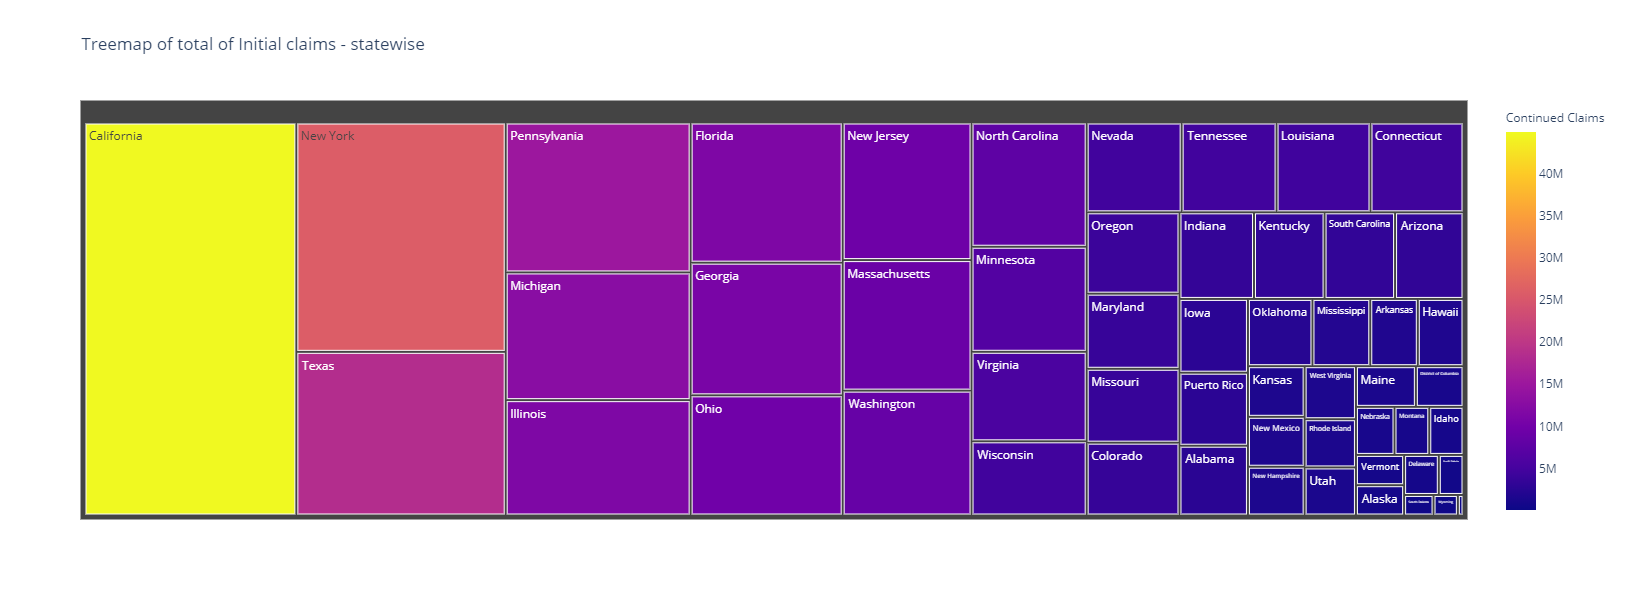

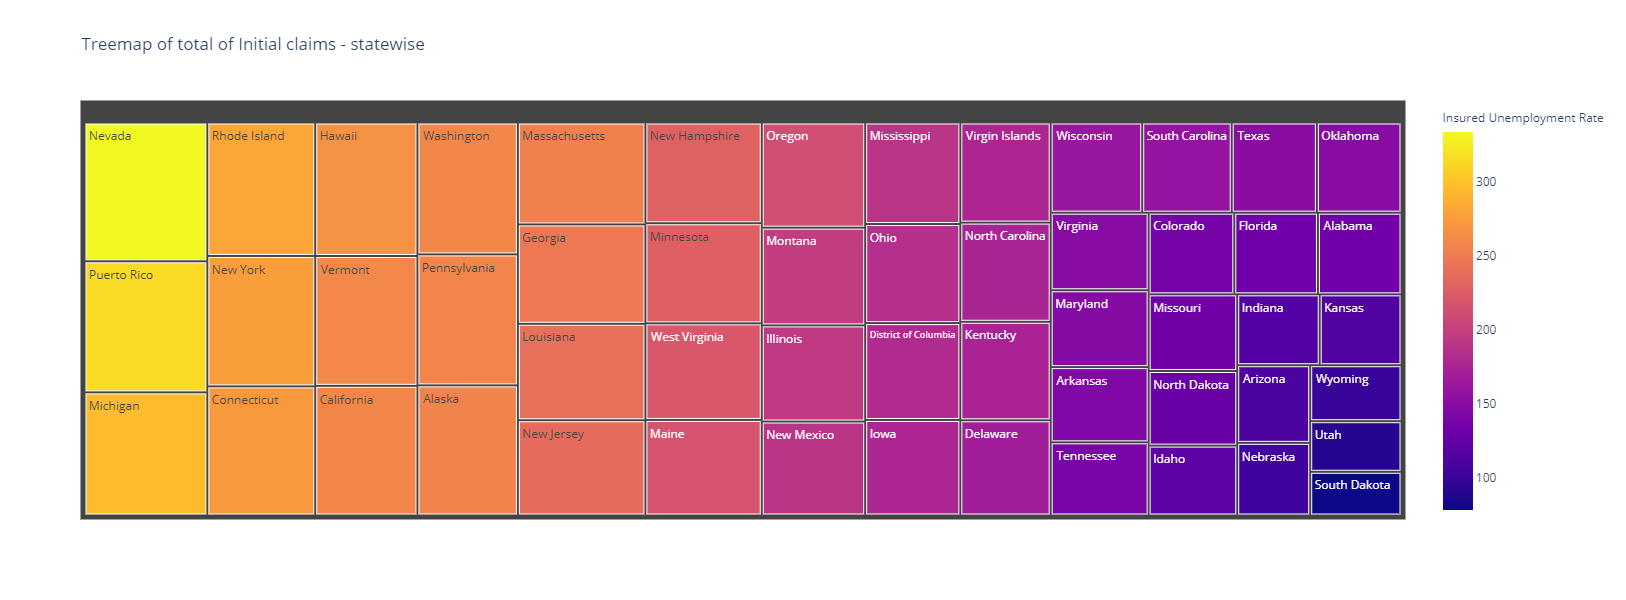

In [112]:
fig = px.treemap(df_statewise, path=['State'], values='Initial Claims',color='Initial Claims',width=1200,height=600,title="Treemap of total of Initial claims - statewise")
fig.show()
fig = px.treemap(df_statewise, path=['State'], values='Continued Claims',color='Continued Claims',width=1200,height=600,title="Treemap of total of Initial claims - statewise")
fig.show()
fig = px.treemap(df_statewise, path=['State'], values='Insured Unemployment Rate',color='Insured Unemployment Rate',width=1200,height=600,title="Treemap of total of Initial claims - statewise")
fig.show()